<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/thuc_hanh_tren_bo_du_lieu_foodPriceinturkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("/content/drive/MyDrive/phân tích dữ liệu/pandas-1/data/bai 3/FoodPrice_in_Turkey.csv")

In [3]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [6]:
df.shape

(7381, 8)

In [7]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [8]:
df.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


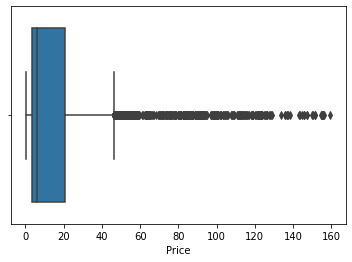

In [11]:
sns.boxplot(df['Price'])

In [13]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

In [14]:
IQR = q3 - q1

In [15]:
df2=df
df2['outlier'] = ~((df['Price'] < (q1 - 1.5*IQR)) | (df['Price'] > (q3 + 1.5*IQR)))

In [16]:
df2 = df2[df2['outlier'] == True]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


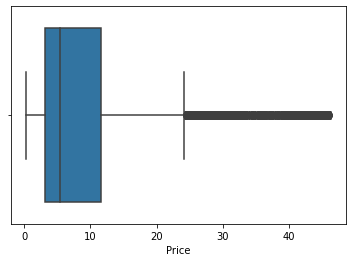

In [17]:
sns.boxplot(df2['Price'])

In [18]:
df2['Price'].describe()

count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64

In [20]:
# chuan hoa du lieu voi minmax scaling
scaler = MinMaxScaler()
df_s = scaler.fit_transform(df2[['Price']])

In [21]:
pd.DataFrame(df_s).describe()

,0
count,6784.000000
mean,0.222830
std,0.253521
min,0.000000
25%,0.061430
50%,0.111297
75%,0.245403
max,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


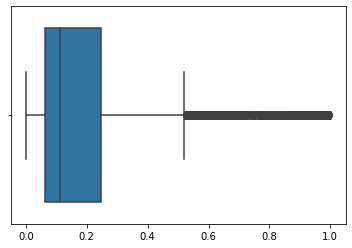

In [22]:
sns.boxplot(df_s)

In [23]:
# chuan hoa du lieu voi robust scaling
scaler = RobustScaler()
df_s = scaler.fit_transform(df2[['Price']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


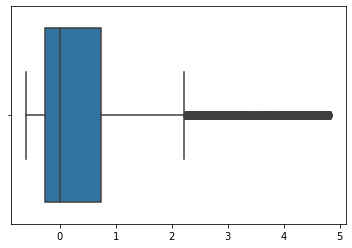

In [24]:
sns.boxplot(df_s)

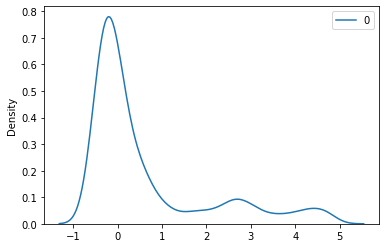

In [26]:
sns.kdeplot(data = df_s)